In [1]:
import os
from numpy import *
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
plt.style.use("seaborn-darkgrid")
# plt.style.use("dark_background") # dark bg plots
sns.set(style="ticks", context="talk")
# %matplotlib inline
# run for jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# disable nonsensical pandas warning 
pd.options.mode.chained_assignment = None

### Folder Structure

In [3]:
#%% Read in data
root = '/home/alal/Dropbox/1_Research/India_Forests/'
code = root + 'Code'
data = root + 'Data'

### Ingest Block level shapefile

In [4]:
%cd {data + '/Spatial/Vectors/2001'}
%ls

/mnt/d/Dropbox/Dropbox/1_Research/India_Forests/Data/Spatial/Vectors/2001
 BLOCKMAP.dbf*                        STATE/
 BLOCKMAP.prj*                        STATE.dbf*
 BLOCKMAP.sbn*                        STATE.prj*
 BLOCKMAP.sbx*                        STATE.sbn*
 BLOCKMAP.shp*                        STATE.sbx*
 BLOCKMAP.shx*                        STATE.shp*
 DISTRICT/                            STATE.shx*
 DISTRICT.dbf*                       'SUB DISTRICT.dbf'*
 DISTRICT.prj*                       'SUB DISTRICT.prj'*
 DISTRICT.sbn*                       'SUB DISTRICT.sbn'*
 DISTRICT.sbx*                       'SUB DISTRICT.sbx'*
 DISTRICT.shp*                       'SUB DISTRICT.shp'*
 DISTRICT.shx*                       'SUB DISTRICT.shx'*
 DISTRICT.xml*                        SUBDISTRICT/
 IND_2001_PHC_Questionnaire_EN.pdf*   TAHSIL/
 IndiaMap2001.pdf*                    TOWN/
 RAILWAY/                             Village_polygons/
 ROAD/                                village_po

In [3]:
path = '/home/users/asimoes/data/vectors/2001/'
block = gpd.read_file(path+'BLOCKMAP.shp')

In [4]:
block.head()
block.info()

,BLOCK_ID,NAME,DISTRICT,STATE_UT,C_CODE01,TOT_NM_HH,TOT_POP,M_POP,F_POP,TOT_L6,...,U_T_MRG_HH,U_M_MRG_HH,U_F_MRG_HH,U_T_MRG_OT,U_M_MRG_OT,U_F_MRG_OT,U_TOT_NNW,U_M_NNW,U_F_NNW,geometry
0,2,Data Not Available,None,None,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((77.57774 35.39891, 77.57571 35.39656..."
1,3,Durbok,Leh (Ladakh),Jammu & Kashmir,None,951,4675,2418,2257,595,...,0,0,0,0,0,0,0,0,0,"POLYGON ((77.32441 35.20002, 77.33263 35.22842..."
2,4,Nubra,Leh (Ladakh),Jammu & Kashmir,None,3372,17367,8994,8373,2171,...,0,0,0,0,0,0,0,0,0,"POLYGON ((76.41376 34.89877, 76.42271 34.89607..."
3,5,Kargil,Kargil,Jammu & Kashmir,None,6024,40718,24008,16710,5721,...,1,0,1,133,108,25,5897,2877,3020,"POLYGON ((76.41376 34.89877, 76.42316 34.88527..."
4,6,Drass,Kargil,Jammu & Kashmir,None,1650,11662,6153,5509,2224,...,0,0,0,0,0,0,0,0,0,"POLYGON ((75.25462 34.62896, 75.26775 34.63229..."


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6348 entries, 0 to 6347
Columns: 171 entries, BLOCK_ID to geometry
dtypes: geometry(1), int64(166), object(4)
memory usage: 8.3+ MB


In [5]:
states = [a for a in block.STATE_UT.unique() if a is not None]
sort(states)

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal  Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshdweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamilnadu', 'Tripura', 'Uttar Pradesh', 'Uttranchal',
       'West Bengal'], dtype='<U20')

In [6]:
state_abrs = dict([
    ('Orissa', 'or'),
    ('Andhra Pradesh', 'ap'),
    ('Jharkhand', 'jk'),
    ('Gujarat', 'gu'),
    ('Maharashtra', 'mh'),
    ('Chhattisgarh', 'ch'),
    ('Madhya Pradesh', 'mp'),
    ('Rajasthan', 'rj'),
    ('Himachal Pradesh', 'hp')
])

sched_area_states = state_abrs.values()

# data prep

In [7]:
block['named'] = block.DISTRICT.str.lower()
block['nameb'] = block.NAME.str.lower()

In [8]:
block['state'] = block.STATE_UT
block["state"].replace(state_abrs, inplace = True)

In [9]:
block['state'].unique()

array([None, 'Jammu & Kashmir', 'hp', 'Punjab', 'Uttranchal', 'Haryana',
       'Chandigarh', 'Uttar Pradesh', 'rj', 'Arunachal  Pradesh', 'Delhi',
       'Sikkim', 'Assam', 'Bihar', 'West Bengal', 'Nagaland', 'mp',
       'Meghalaya', 'Manipur', 'jk', 'gu', 'Mizoram', 'Tripura', 'ch',
       'or', 'mh', 'Daman & Diu', 'ap', 'Karnataka', 'Pondicherry', 'Goa',
       'Tamilnadu', 'Kerala', 'Dadra & Nagar Haveli', 'Lakshdweep',
       'Andaman & Nicobar'], dtype=object)

In [10]:
# initialise values to 0
block['sch'] = 0
block['block_samp'] = 0

# Assign Treatment 

### Function that takes list of districts and (district, block) pairs and modifies dataframe inplace

In [11]:
def sched_labeller(df, st, d_sch, b_sch, d_block_samp=None):
    """
    function to label blocks as scheduled and block_samp based on list of district names and a dict
    """
    df.loc[(df.state == st) & (df.named.isin(d_sch)), 'sch'] = 1
    if d_block_samp is not None:
        df.loc[(df.state == st) & (df.named.isin(d_block_samp)), 'block_samp'] = 1 
    # iterate through dict of (district, block) pairs and flag sch = 1 for each 
    for d, b in b_sch.items():
        mask = (df.state == st) & (df.named == d) & (df.nameb == b)
        df.loc[mask, 'sch'] = 1 

### Orissa

In [12]:
# Orissa
or_d_sch = ["mayurbhanj", "sundargarh", "koraput"]
or_d_block_samp = [
    "sambalpur", "kendujhar", "baudh", "kandhamal", "kalahandi", "baleshwar",
    "gajapati", "ganjam"
]

or_b_sch = dict([("sambalpur", "kochinda"), ("kendujhar", "kendujhargarh"),
                 ("kendujhar", "telkoi"), ("kendujhar", "champua"),
                 ("kendujhar", "barbil"), ("baudh", "kantamal"),
                 ("kandhamal", "gudayagiri"), ("kandhamal", "baliguda"),
                 ("kalahandi", "thuamulrampur"), ("kalahandi", "lanjigarh"),
                 ("baleshwar", "nilagiri"), ("gajapati", "rudaygiri"),
                 ("gajapati", "guma"), ("gajapati", "rayagada"),
                 ("gajapati", "parlakhemundigosani"), ("ganjam", "surada")])

sched_labeller(block, 'or', or_d_sch, or_b_sch, or_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    6285
1      63
Name: sch, dtype: int64

0    6257
1      91
Name: block_samp, dtype: int64

In [13]:
#%% Andhra
ap_d_sch = ["visakhapatnam", "eastgodavari"]
ap_d_block_samp = ["adilabad", "warangal", "khammam"]
ap_b_sch = dict([("adilabad", "adilabad"), ("adilabad", "boath"),
                 ("adilabad", "asifabad"), ("adilabad", "sirpur"),
                 ("adilabad", "luxettipet"), ("warangal", "mulug"),
                 ("warangal", "narsampet"), ("khammam", "palwancha"),
                 ("khammam", "yellandu")])

sched_labeller(block, 'ap', ap_d_sch, ap_b_sch, ap_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    6239
1     109
Name: sch, dtype: int64

0    6108
1     240
Name: block_samp, dtype: int64

In [14]:
#%% Jharkhand
jk_d_sch = [
    "ranchi", "lohardaga", "gumla", "purbisinghbhum", "pashchimisinghbhum",
    "sahibganj", "pakaur", "dumka"
]
jk_d_block_samp = ["gumla", "palamu", "godda", "dumka", "garhwa"]
jk_b_sch = dict([("gumla", "simdega"), ("palamu", "latehar"),
                 ("palamu", "satbarwa"), ("godda", "sundarpahari"),
                 ("godda", "boarijor"), ("dumka", "jamtara"),
                 ("garhwa", "bhandaria")])
sched_labeller(block, 'jk', jk_d_sch, jk_b_sch, jk_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    6164
1     184
Name: sch, dtype: int64

0    6035
1     313
Name: block_samp, dtype: int64

In [15]:
#%%# Gujarat
gu_d_sch = [
    "surat", "bharuch", "narmada", "navsari", "valsad", "dohad", "panchmahals",
    "vadodara", "sabarkantha"
]

gu_b_sch = dict([("thedangs", "thedangs"), ("surat", "bardoli"),
                 ("surat", "mangrol"), ("surat", "mandvi"), ("surat", "mahuva"),
                 ("surat", "vyara"), ("bharuch", "jhagadia"),
                 ("bharuch", "valia"), ("narmada", "dediapada"),
                 ("narmada", "nandod"), ("narmada", "sagbara"),
                 ("navsari", "chikhli"), ("navsari", "bansda"),
                 ("valsad", "dharampur"), ("valsad", "umbergaon"),
                 ("valsad", "pardi"), ("dohad", "dohad"), ("dohad", "jhalod"),
                 ("dohad", "limkheda"), ("dohad", "devgadbaria"),
                 ("panchmahals", "santrampur"), ("vadodara", "chhotaudaipur"),
                 ("vadodara", "chhotaudaipur"), ("vadodara", "nasvadi"),
                 ("sabarkantha", "khedbrahma"), ("sabarkantha", "bhiloda"),
                 ("sabarkantha", "meghraj"), ("sabarkantha", "vijaynagar")])
sched_labeller(block, 'gu', gu_d_sch, gu_b_sch)
block.sch.value_counts()
block.block_samp.value_counts()

0    6108
1     240
Name: sch, dtype: int64

0    6035
1     313
Name: block_samp, dtype: int64

In [16]:
#%%# Maharashtra
mh_d_sch = [
    "thane", "nashik", "dhule", "nandurbar", "jalgaon", "pune", "nanded",
    "yavatmal", "gadchiroli", "chandrapur", "ahmadnagar"
]
mh_b_sch = dict(
    [("thane", "palghar"), ("thane", "vasai"), ("thane", "bhiwandi"),
     ("thane", "murbad"), ("nashik", "dindori"), ("nashik", "igatpuri"),
     ("nashik", "nashik"), ("nashik", "baglan"), ("dhule", "sakri"),
     ("dhule", "shirpur"), ("nandurbar", "nandurbar"),
     ("nandurbar", "shahade"), ("jalgaon", "chopda"), ("jalgaon", "raver"),
     ("jalgaon", "yawal"), ("pune", "ambegaon"), ("pune", "junnar"),
     ("nanded", "kinwat"), ("yavatmal", "maregaon"), ("yavatmal", "ralegaon"),
     ("yavatmal", "kelapur"), ("yavatmal", "ghatanji"),
     ("gadchiroli", "gadchiroli"), ("gadchiroli", "armori"),
     ("gadchiroli", "chamorshi"), ("chandrapur", "rajura"),
     ("ahmadnagar", "akola")])
sched_labeller(block, 'mh', mh_d_sch, mh_b_sch)
block.sch.value_counts()
block.block_samp.value_counts()

0    5967
1     381
Name: sch, dtype: int64

0    6035
1     313
Name: block_samp, dtype: int64

In [17]:
#%%# Chhatisgarh
ch_d_sch = ['bastar', 'surguja']
ch_d_block_samp = [
    "jashpur", "raigarh", "bilaspur", "korba", "durg", "rajnandgaon", "raipur",
    "dhamtari"
]
ch_b_sch = dict([("jashpur", "jashpurnagar"), ("raigarh", "kharsia"),
                 ("bilaspur", "kota"), ("bilaspur", "gaurellano1"),
                 ("bilaspur", "gaurellano2"), ("bilaspur", "marwahi"),
                 ("korba", "katghora"), ("durg", "dondi"),
                 ("rajnandgaon", "chowki"), ("rajnandgaon", "mohla"),
                 ("rajnandgaon", "manpur"), ("raipur", "mainpur"),
                 ("raipur", "chhura"), ("raipur", "gariaband"),
                 ("dhamtari", "sihwanagri")])
sched_labeller(block, 'ch', ch_d_sch, ch_b_sch, ch_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    5927
1     421
Name: sch, dtype: int64

0    5964
1     384
Name: block_samp, dtype: int64

In [18]:
#%%# Madhya Pradesh
mp_d_sch = ['jhabua', 'mandla']
mp_d_block_samp = [
    "shahdol", "dhar", "barwani", "westnimar", "eastnimar", "ratlam", "betul",
    "seoni", "balaghat", "hoshangabad", "sidhi", "sheopur", "chhindwara"
]
mp_b_sch = dict([("shahdol", "pushparajgarh"), ("shahdol", "sohagpur"),
                 ("shahdol", "jaisinghnagar"), ("dhar", "sardarpur"),
                 ("dhar", "dhar"), ("dhar", "manawar"), ("dhar", "kukshi"),
                 ("barwani", "barwani"), ("barwani", "rajpur"),
                 ("barwani", "sendhwa"), ("westnimar", "bhikangaon"),
                 ("westnimar", "maheshwar"), ("eastnimar", "khalwa"),
                 ("eastnimar", "khaknar"), ("ratlam", "sailana"),
                 ("betul", "betul"), ("betul", "bhainshdehi"),
                 ("seoni", "kurai"), ("seoni", "lakhnadon"),
                 ("balaghat", "baihar"), ("hoshangabad", "kesala"),
                 ("sidhi", "kusmi"), ("sheopur", "karahal"),
                 ("chhindwara", "tamia"), ("chhindwara", "jamaijunnardeo"),
                 ("chhindwara", "harrai"), ("chhindwara", "bichhua")])
sched_labeller(block, 'mp', mp_d_sch, mp_b_sch, mp_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    5895
1     453
Name: sch, dtype: int64

0    5872
1     476
Name: block_samp, dtype: int64

In [19]:
#%%# Rajasthan
rj_d_sch = ['banswara', 'dungarpur']
rj_d_block_samp = ['udaipur']
rj_b_sch = dict([("udaipur", "sisarma"), ("udaipur", "bujdha"),
                 ("udaipur", "dodavli"), ("udaipur", "alsigdh"),
                 ("udaipur", "pduna"), ("udaipur", "chawand"),
                 ("udaipur", "saru"), ("udaipur", "tidi"), ("udaipur", "jawas"),
                 ("udaipur", "barapal"), ("udaipur", "titrdi"),
                 ("udaipur", "wati"), ("udaipur", "chansada"),
                 ("udaipur", "javad"), ("udaipur", "dantisr"),
                 ("udaipur", "lkdwas")])
sched_labeller(block, 'rj', rj_d_sch, rj_b_sch, rj_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    5882
1     466
Name: sch, dtype: int64

0    5861
1     487
Name: block_samp, dtype: int64

In [20]:
#%%# Himanchal Pradesh
hp_d_sch = ['lahul&spiti', 'kinnaur']
hp_d_block_samp = ['chamba']
hp_b_sch = dict([('chamba', 'pangi'), ('chamba', 'brahmaur')])

sched_labeller(block, 'hp', hp_d_sch, hp_b_sch, hp_d_block_samp)
block.sch.value_counts()
block.block_samp.value_counts()

0    5878
1     470
Name: sch, dtype: int64

0    5854
1     494
Name: block_samp, dtype: int64

## Write file

In [21]:
path = '/home/users/asimoes/data/processed/'
block.to_file(path + "BLOCKS_sch_coded.shp")

# Plot Treatment

In [13]:
standalone = True
if standalone: 
    block = gpd.read_file(data + "/Spatial/Processed/BLOCKS_sch_coded.shp")

In [22]:
def plot_treatment(statename, colname='sch'):
    """
    Function to slice geodataframe and plot treatment by state
    """
    df = block.query('state == "{0}"'.format(statename))
    f, ax = plt.subplots(1, figsize=(9,9))
    df.plot(column=colname, categorical=True, legend=True, 
            cmap = 'viridis', ax=ax)
    plt.suptitle('treatment:{0} ; state:{1}'.format(colname, statename),color='r')
    ax.set_axis_off()

In [23]:
sched_area_states 

dict_values(['or', 'ap', 'jk', 'gu', 'mh', 'ch', 'mp', 'rj', 'hp'])

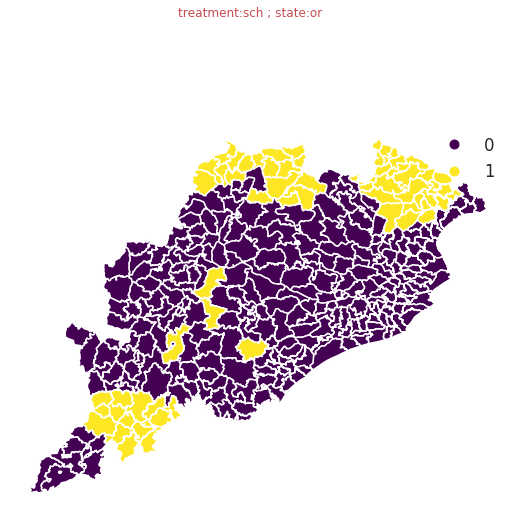

In [24]:
plot_treatment('or')

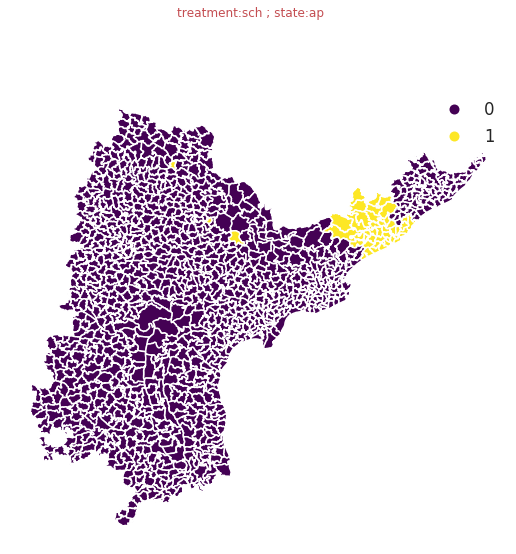

In [25]:
plot_treatment('ap')

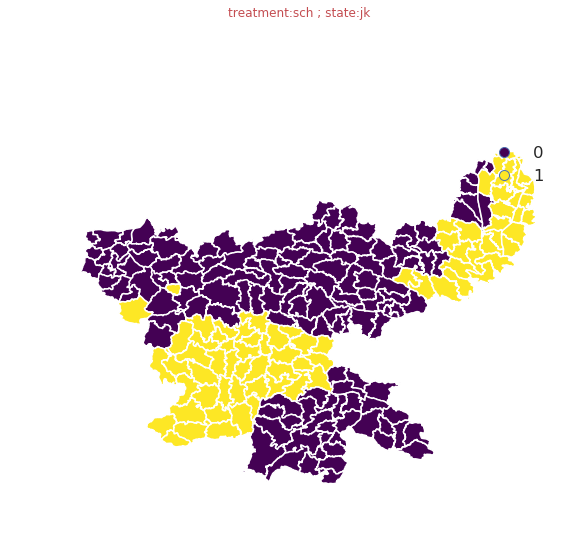

In [39]:
plot_treatment('jk')

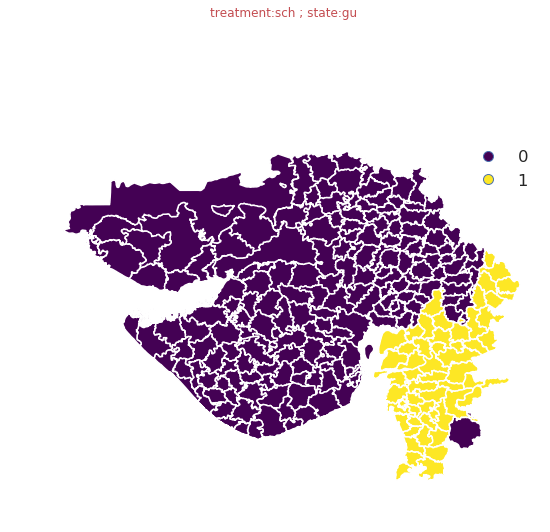

In [40]:
plot_treatment('gu')

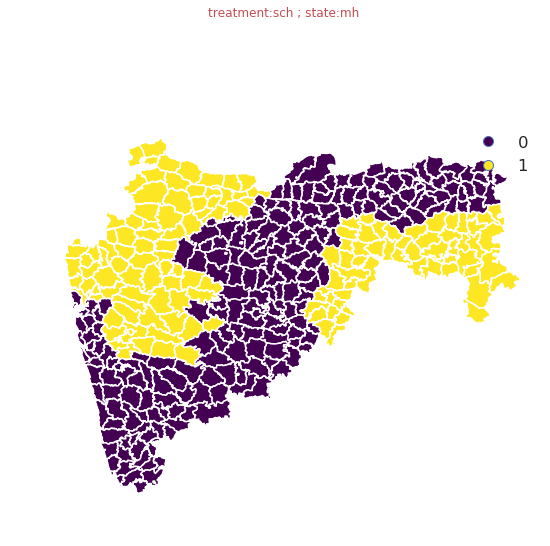

In [41]:
plot_treatment('mh')

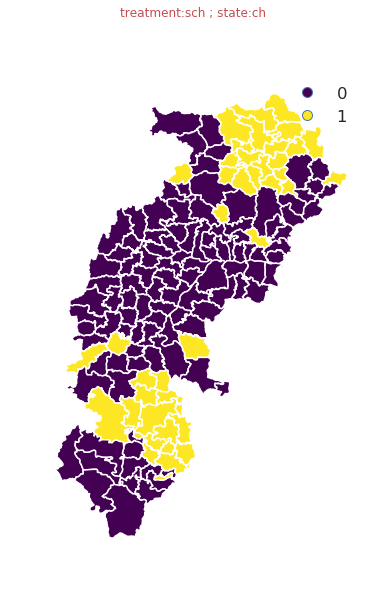

In [42]:
plot_treatment('ch')

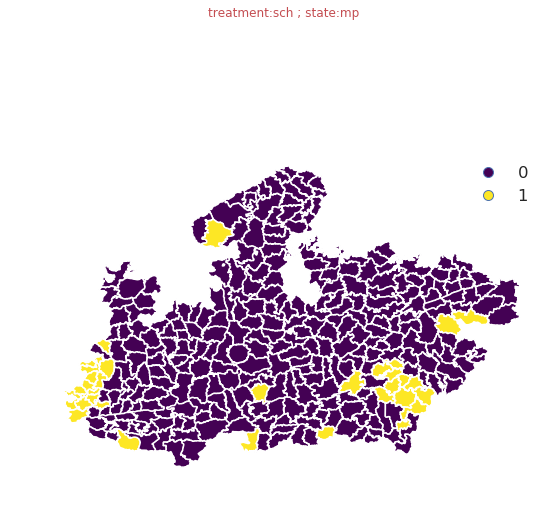

In [43]:
plot_treatment('mp')

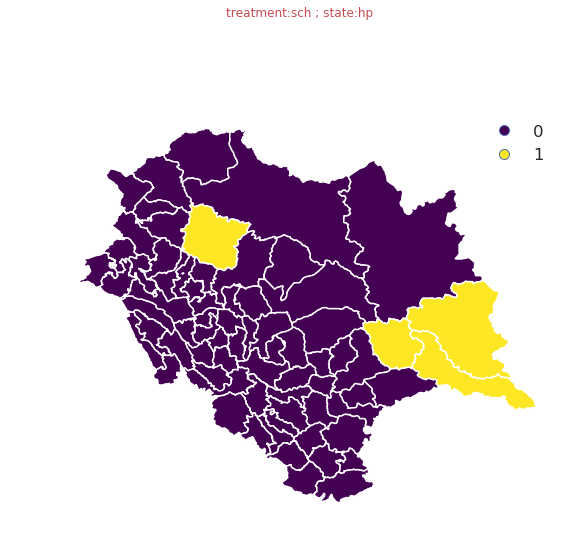

In [44]:
plot_treatment('hp')

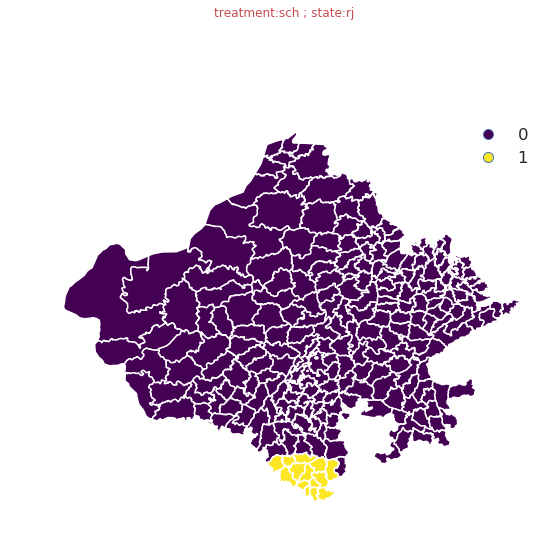

In [45]:
plot_treatment('rj')

# Subset by proximity to treatment blocks 

In [5]:
standalone = True
if standalone: 
    block = gpd.read_file(data + "/Spatial/Processed/BLOCKS_sch_coded.shp")

### Maybe Reproject for distances to be meaningful?

### Kalianpur Projection - Kalianpur 1975 / India zone I
[link](https://epsg.io/24378)

failed

### Boundaries of treated blocks 

In [26]:
treatblocks = block.loc[block.sch == 1]
treatblocks.shape
block.C_CODE01.nunique()

(470, 176)

6218

In [40]:
treatblocks.shape

(470, 176)

## Create decimal degree buffers around treated block boundaries

In [7]:
%cd {data + '/Spatial/Processed/'}

/mnt/d/Dropbox/Dropbox/1_Research/India_Forests/Data/Spatial/Processed


In [36]:
treatblocks.crs

{'init': 'epsg:4326'}

In [28]:
def buffer_creator(distance):
    treatbuf = treatblocks.boundary.buffer(distance)
    treated_buffers = gpd.GeoDataFrame(treatbuf).rename(columns={0:'geometry'}).set_geometry('geometry')
    treated_buffers.crs = treatblocks.crs
    block_buf = gpd.overlay(block, treated_buffers, how='intersection')
    # Dissolve back into blocks 
    block_buf2 = block_buf.dissolve(by='C_CODE01')
    return block_buf2

In [9]:
buf = buffer_creator(1.0)

Text(0.5, 0.98, '1 degree buffers')

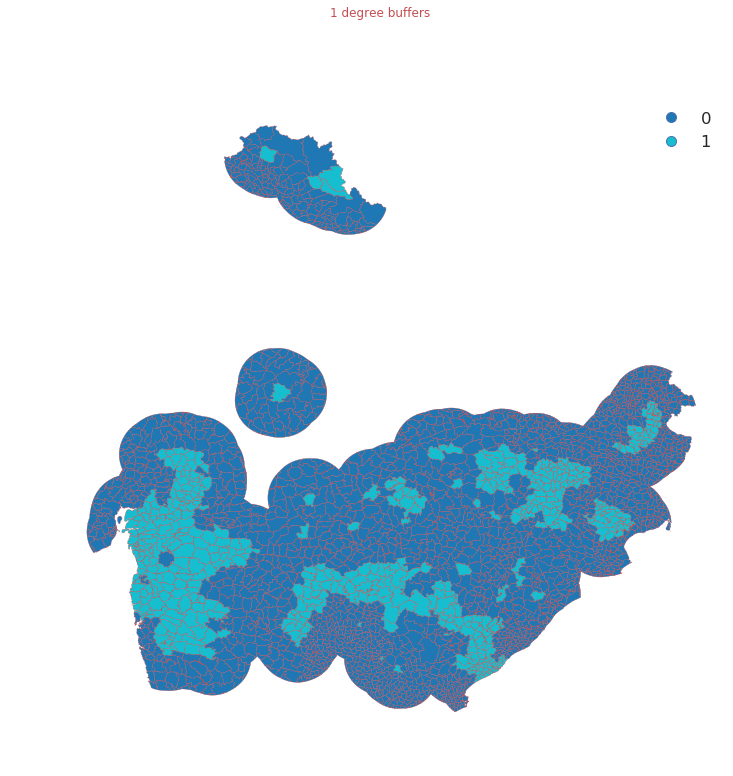

In [10]:
f, ax = plt.subplots(1, figsize=(12,12))
buf.plot(column='sch', categorical=True, legend=True, edgecolor='r',linewidth=0.3,ax=ax)
plt.suptitle('1 degree buffers',color='r')
ax.set_axis_off()

In [11]:
buf.to_file('Blocks_proximate_treat_10.shp')

/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [12]:
buf = buffer_creator(0.5)

Text(0.5, 0.98, '0.5 degree buffers')

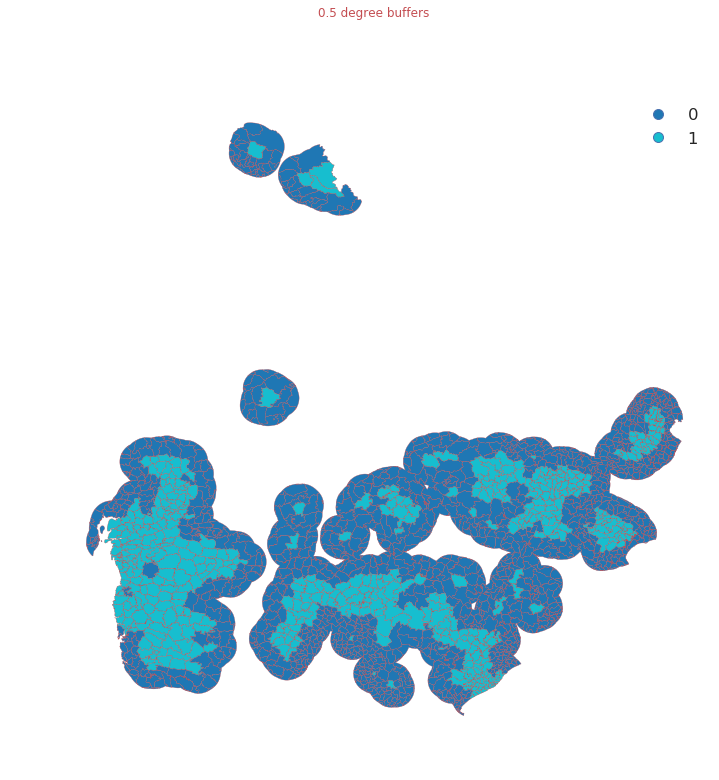

In [13]:
f, ax = plt.subplots(1, figsize=(12,12))
buf.plot(column='sch', categorical=True, legend=True, edgecolor='r',linewidth=0.3,ax=ax)
plt.suptitle('0.5 degree buffers',color='r')
ax.set_axis_off()

In [14]:
buf.to_file('Blocks_proximate_treat_05.shp')

/home/alal/anaconda3/envs/gds/lib/python3.6/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():
